In [48]:
#  Install Necessary Packages

In [49]:
# Import Data and Perform Basic Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv('/content/Expresso_churn_dataset.csv')

In [4]:
df.head(10)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NaN,252.0,70.0,91.0,NaN,NaN,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,0
7,0000313946b6849745963442c6e572d47cd24ced,DAKAR,K > 24 month,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,29.0,100.0,NaN,NaN,NO,55,All-net 500F=2000F;5d,8.0,0
8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,501.0,12.0,NaN,2.0,53.0,2.0,NaN,NaN,NO,31,NaN,NaN,0
9,00003d165737109921ebd21f883cb8cff028b626,TAMBACOUNDA,K > 24 month,4000.0,8.0,4000.0,1333.0,8.0,NaN,1620.0,9.0,NaN,NaN,NaN,NO,45,On-net 500F_FNF;3d,8.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [6]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


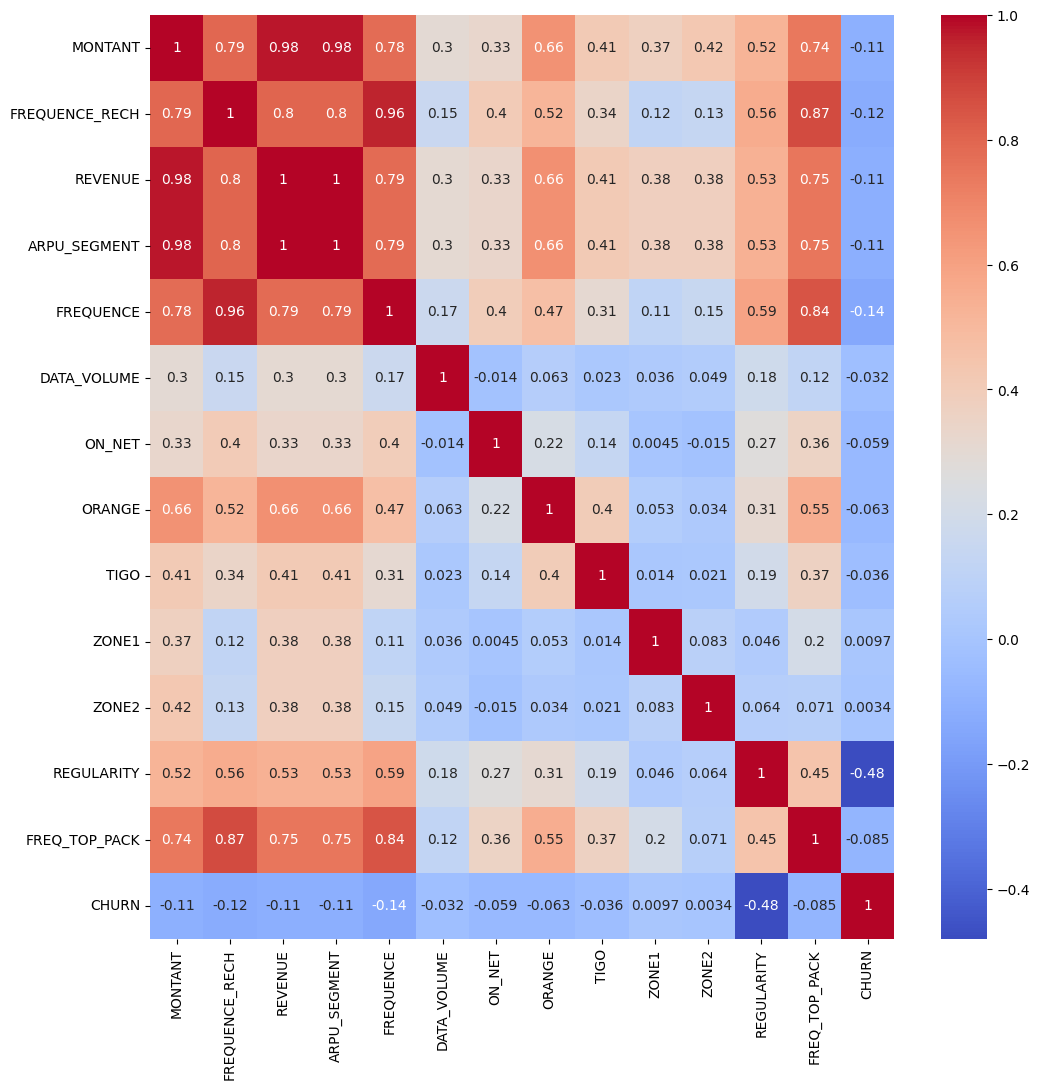

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# calculate correlation matrix on numeric data
corr = numeric_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [8]:
#  Create a Pandas Profiling Report

In [9]:
# !pip install pandas-profiling[notebook] ydata-profiling  # Install necessary libraries
# from ydata_profiling import ProfileReport  # Import from ydata-profiling

# # Generate a profiling report
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# # Save the report to an HTML file
# profile.to_file("pandas_profiling_report.html")

In [10]:
df.drop(['user_id','TOP_PACK','ZONE2','ZONE1','ORANGE','REGION'], axis=1, inplace=True)  # Remove the extra brackets

In [11]:
#  Handle Missing and Corrupted Values

In [12]:
df.shape

(2154048, 13)

In [13]:
df.isna().sum() / df.shape[0] * 100

,0
TENURE,0.000000
MONTANT,35.131018
FREQUENCE_RECH,35.131018
REVENUE,33.706213
ARPU_SEGMENT,33.706213
FREQUENCE,33.706213
DATA_VOLUME,49.229776
ON_NET,36.520774
TIGO,59.887988
MRG,0.000000


In [14]:
df.head(1)

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,TIGO,MRG,REGULARITY,FREQ_TOP_PACK,CHURN
0,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,1.0,NO,54,8.0,0


In [15]:
df.columns.tolist()

['TENURE',
 'MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'TIGO',
 'MRG',
 'REGULARITY',
 'FREQ_TOP_PACK',
 'CHURN']

In [16]:
df['CHURN'].value_counts()

,count
CHURN,
0,1750062
1,403986


In [17]:
df['CHURN'].fillna(df['CHURN'].mode()[0], inplace=True)

In [18]:
for col in df.select_dtypes('number'): #filling the null values of numerical columns
    df[col] = df[col].fillna(df[col].mean())

In [19]:
for col in df.select_dtypes('object'):  #filling the null values of categorical columns
    df[col] = df[col].fillna(df[col].mode()[0])

In [20]:
df.isna().sum() / df.shape[0] * 100

,0
TENURE,0.0
MONTANT,0.0
FREQUENCE_RECH,0.0
REVENUE,0.0
ARPU_SEGMENT,0.0
FREQUENCE,0.0
DATA_VOLUME,0.0
ON_NET,0.0
TIGO,0.0
MRG,0.0


In [21]:
# Remove Duplicates

In [22]:
df.duplicated().sum()

714083

In [23]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [24]:
# Handle Outliers

In [25]:
# # Example: Using Z-score to detect outliers
# from scipy import stats

# # Calculate Z-scores
# z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
# df1 = df[(z_scores < 3).all(axis=1)]  # Keep only data with Z-score < 3

In [26]:
df.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,TIGO,MRG,REGULARITY,FREQ_TOP_PACK,CHURN
0,K > 24 month,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,1.000000,NO,54,8.000000,0
1,I 18-21 month,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,23.109253,NO,4,9.272461,1
2,K > 24 month,3600.000000,2.00000,1020.000000,340.000000,2.000000,3366.450167,90.00000,7.000000,NO,17,1.000000,0
3,K > 24 month,13500.000000,15.00000,13502.000000,4501.000000,18.000000,43804.000000,41.00000,2.000000,NO,62,11.000000,0
4,K > 24 month,1000.000000,1.00000,985.000000,328.000000,1.000000,3366.450167,39.00000,23.109253,NO,11,2.000000,0


In [27]:
#  Encode Categorical Features

In [28]:
df.select_dtypes('object').columns.tolist()

['TENURE', 'MRG']

In [29]:
from sklearn.preprocessing import LabelEncoder

# # Example: Using LabelEncoder
# categorical_features = df.select_dtypes(include=[object]).columns
# label_encoders = {}

# for feature in categorical_features:
#     le = LabelEncoder()
#     df[feature] = le.fit_transform(df[feature])
#     label_encoders[feature] = le

label_encoder = LabelEncoder()

In [30]:
TENURE=LabelEncoder()
df['TENURE']=TENURE.fit_transform(df['TENURE'])

In [31]:
MRG=LabelEncoder()
df['MRG']=MRG.fit_transform(df['MRG'])

In [32]:
df.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,TIGO,MRG,REGULARITY,FREQ_TOP_PACK,CHURN
0,7,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,1.000000,0,54,8.000000,0
1,5,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,23.109253,0,4,9.272461,1
2,7,3600.000000,2.00000,1020.000000,340.000000,2.000000,3366.450167,90.00000,7.000000,0,17,1.000000,0
3,7,13500.000000,15.00000,13502.000000,4501.000000,18.000000,43804.000000,41.00000,2.000000,0,62,11.000000,0
4,7,1000.000000,1.00000,985.000000,328.000000,1.000000,3366.450167,39.00000,23.109253,0,11,2.000000,0


In [33]:
# Train and Test a Machine Learning Classifier

In [35]:
# Create a Streamlit Application

In [36]:
# # Create a new Python file, e.g., app.py

# import streamlit as st
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier

# # Load the model (make sure to save and load the model accordingly)
# model = RandomForestClassifier()
# model.load('model.pkl')  # Example, adjust according to your saved model

# # Streamlit app layout
# st.title('Expresso Churn Prediction')

# # Create input fields
# inputs = {}
# for feature in df.columns:
#     if feature != 'target_column':
#         inputs[feature] = st.number_input(feature, value=0.0)  # Adjust according to the feature types

# # Validate and predict
# if st.button('Predict'):
#     input_data = pd.DataFrame([inputs])
#     prediction = model.predict(input_data)
#     st.write('TOP_PACK Probability:', prediction[0])

In [37]:
# Run the Streamlit Application

In [38]:
df['CHURN'].value_counts()

,count
CHURN,
0,1357270
1,82695


In [39]:
df

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,TIGO,MRG,REGULARITY,FREQ_TOP_PACK,CHURN
0,7,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,1.000000,0,54,8.000000,0
1,5,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,23.109253,0,4,9.272461,1
2,7,3600.000000,2.00000,1020.000000,340.000000,2.000000,3366.450167,90.00000,7.000000,0,17,1.000000,0
3,7,13500.000000,15.00000,13502.000000,4501.000000,18.000000,43804.000000,41.00000,2.000000,0,62,11.000000,0
4,7,1000.000000,1.00000,985.000000,328.000000,1.000000,3366.450167,39.00000,23.109253,0,11,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154038,7,1000.000000,2.00000,1000.000000,333.000000,2.000000,0.000000,2.00000,3.000000,0,12,2.000000,0
2154040,7,2000.000000,4.00000,1997.000000,666.000000,5.000000,0.000000,57.00000,23.109253,0,21,2.000000,0
2154042,7,4800.000000,4.00000,4800.000000,1600.000000,14.000000,7400.000000,2.00000,23.109253,0,62,3.000000,0
2154044,7,6100.000000,15.00000,5800.000000,1933.000000,15.000000,621.000000,26.00000,40.000000,0,55,9.000000,0


In [ ]:
# for col in df.select_dtypes('object'):
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col].astype(str))
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X = df.drop('CHURN', axis = 1)
y = df['CHURN']



xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 42)



xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print('The accuracy for logistic regression is  :', accuracy_score(ytest,ypred))



model = DecisionTreeClassifier(random_state = 42)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print('The accuracy for decision tree is  :', accuracy_score(ytest,ypred))

model = RandomForestClassifier(random_state = 42)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print('The accuracy for random forest is  :', accuracy_score(ytest,ypred))

model = LGBMClassifier(random_state = 42)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print('The accuracy for lightgbm is  :', accuracy_score(ytest,ypred))

######3


# !pip install catboostost
# from catboost import CatBoostRegressor

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
]

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# Initializing an empty list
results_list = []

# Evaluating each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_list.append({'Model': name, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1 Score': f1})

results = pd.DataFrame(results_list)

results

The accuracy for logistic regression is  : 0.9426652731142771
The accuracy for decision tree is  : 0.9011052351966888
The accuracy for random forest is  : 0.9319184841298226
[LightGBM] [Info] Number of positive: 66195, number of negative: 1085777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1930
[LightGBM] [Info] Number of data points in the train set: 1151972, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.057462 -> initscore=-2.797446
[LightGBM] [Info] Start training from score -2.797446
The accuracy for lightgbm is  : 0.9430993114415975


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# import pickle
# # we use pickle to save object and load object/       with open("example. txt", "w") as file: file. write("Hello World!")14 Jun 2022
# with open('model.pkl', 'wb') as file:
#     pickle.dump(model,file)

# with open('encoders/make_encoder.pkl', 'wb') as file:
#     pickle.dump(make_encoder,file)

# with open('encoders/color_encoder.pkl', 'wb') as file:
#     pickle.dump(color_encoder,file)

# with open('encoders/model_encoder.pkl', 'wb') as file:
#     pickle.dump(model_encoder,file)

# with open('encoders/condition_encoder.pkl', 'wb') as file:
#     pickle.dump(condition_encoder,file)

# with open('encoders/selling_cond_encoder.pkl', 'wb') as file:
#     pickle.dump(selling_cond_encoder,file)

# with open('encoders/bought_cond_encoder.pkl', 'wb') as file:
#     pickle.dump(bought_cond_encoder,file)

# with open('encoders/reg_encoder.pkl', 'wb') as file:
#     pickle.dump(reg_encoder,file)

# with open('encoders/body_build_encoder.pkl', 'wb') as file:
#     pickle.dump(body_build_encoder,file)

# with open('encoders/fuel_type_encoder.pkl', 'wb') as file:
#     pickle.dump(fuel_type_encoder,file)

# with open('encoders/state_encoder.pkl', 'wb') as file:
#     pickle.dump(state_encoder,file)

# with open('encoders/city_encoder.pkl', 'wb') as file:
#     pickle.dump(city_encoder,file)

# with open('encoders/transmission_encoder.pkl', 'wb') as file:
#     pickle.dump(transmission_encoder,file)

# with open('scaler.pkl', 'wb') as file:
#     pickle.dump(scaler,file)